# Introduction
In this project, a real-life problem will be presented that can use machine learning methods to solve it or to find the closest and most appropriate possible solution

# Describe the problem and the source of data
A sample of the data set for diabetic patients was taken from the Frankfurt Hospital. The problem is trying to predict whether the patient, based on the known symptoms, has diabetes or not.

# Import needed libraries and setting global variables

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB

# sns.set_theme(style="whitegrid")
plt.style.use("seaborn")
random_state = 42

# Data Cleaning

In [ ]:
df = pd.read_csv("diabetes.csv")
df.head()

## Describe the data statistically and visualize the data

In [ ]:
df["Pregnancies"].unique()

In [ ]:
df.info()

### Check for wrong values

In [ ]:
df.replace(0,np.NaN).isnull().sum()

### Feature Domain
- Pregenancies: can have 0 as values
- Gloucose: cannot have 0  as values
- BloodPressure: cannot have 0  as values
- SkinThickness: cannot have 0  as values
- Insulin: cannot have 0  as values
- BMI: cannot have 0  as values
- DiabetesPedigreeFunctionL: cannot have 0  as values
- Age: cannot have 0  as values

so, we have two solution either delete the feature or replace the wrong value with the mean value.
Insulin and SkinThickness have more wrong values, we delete them and replace the wrong value with the mean for other feature.

In [ ]:
df.drop("Insulin", axis=1, inplace=True)
df.drop("SkinThickness", axis=1, inplace=True)

In [ ]:
# replace 0 value with None
df['Glucose'].replace(0,np.NaN,inplace=True)
df['BloodPressure'].replace(0,np.NaN,inplace=True)
df['BMI'].replace(0,np.NaN,inplace=True)
print(f"Glucose: {df.Glucose.mean()}\nBloodPressure: {df.BloodPressure.mean()}\nBMI: {df.BMI.mean()}")

In [ ]:
# replace nan with the mean for each feature
df['Glucose'].fillna(df['Glucose'].mean(),inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)
print(f"Glucose: {df.Glucose.mean()}\nBloodPressure: {df.BloodPressure.mean()}\nBMI: {df.BMI.mean()}")

### Describing the data
- Pregenancies: Pregnancy is the term used to describe the period in which a fetus develops inside a woman's womb or uterus.
- Gloucose: Glucose is the main type of sugar in the blood and is the major source of energy for the body's cells.
- BloodPressure: Blood pressure is the pressure of circulating blood against the walls of blood vessels.
- SkinThickness 
- Insulin: Insulin is a peptide hormone produced by beta cells of the pancreatic islets; it is considered to be the main anabolic hormone of the body.
- BMI: Body mass index is a value derived from the mass and height of a person. The BMI is defined as the body mass divided by the square of the body height
- DiabetesPedigreeFunction: a synthesis of the diabetes mellitus history in relatives and the genetic relationship of those relatives to the subject.
- Age

In [ ]:
df.describe()

In [ ]:
# show the number of people having diabete and not having, 0: not have, 1: have diabete
sns.countplot(x=df['Outcome'])

### Glucose with recpect to outcomes histogram:

In [ ]:
# Glucose distributtion, and same for the following figures
sns.displot(data=df, x="Glucose", col="Outcome")
plt.show()

### Blood Pressure with recpect to outcomes histogram:

In [ ]:
sns.displot(data=df, x="BloodPressure", col="Outcome")
plt.show()

### BMI with recpect to outcomes histogram:

In [ ]:
sns.displot(data=df, x="BMI", col="Outcome")
plt.show()

### Diabetes Pedigree Function with recpect to outcomes histogram:

In [ ]:
sns.displot(data=df, x="DiabetesPedigreeFunction", col="Outcome")
plt.show()

### Age with recpect to outcomes histogram:

In [ ]:
sns.displot(data=df, x="Age", col="Outcome")
plt.show()

### Correlation that gives information about what the most feature that have an effect on the outcome:

In [ ]:

plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)

## Preprocessing the data:

In [ ]:
# Create matrix of feature and vector of outcome
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [ ]:
# split the data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=random_state)

# Models:
we create a Dictionary to store the metrics of the models for later use. we will use it to compare the models that we use in this project.

In [ ]:
# we use this varible to store information about models scores
models_metrics = {}

## Grid Search Explanation:

GridSearchCV is a library function that is a member of sklearn’s model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.

[Small Article explaning grid search](https://towardsdatascience.com/grid-search-for-hyperparameter-tuning-9f63945e8fec)

## K-Nearest Neighbors
KNN stands for k-Nearest Neighbours. It is a supervised learning algorithm. This means that we train it under supervision. KNN tries to predict the correct class for the test data by calculating the distance between the test data and all the training points. Then select the K number of points which is closet to the test data.

In [ ]:
# dictionary that hold the parameters and the values we want to test
param_dict = {
    "n_neighbors":[1,3,5,7,9,100,200,300,400,500,600,700,800,900,1000,1100],
    "weights": ["uniform", "distance"],
}
# cv: cross validation, scoring is the metric we use compare between each model
knn_gs = GridSearchCV(KNeighborsClassifier(), param_grid=param_dict, cv=5, scoring="accuracy")

In [ ]:
# train the model, and extract the best parameter 
knn_gs.fit(train_X, train_y)
knn_param = knn_gs.best_params_

In [ ]:
# predict the test set and draw the confusion matrix
test_predict = knn_gs.predict(test_X)
ConfusionMatrixDisplay.from_estimator(knn_gs, test_X, test_y, display_labels=["No Diabetes", "Diabetes"])
plt.show()

### Results of KNN model:

In [ ]:
# other metric 
knn_accuracy = accuracy_score(test_y, test_predict)
knn_precision  = precision_score(test_y, test_predict)
knn_recall  = recall_score(test_y, test_predict)
print(f"Accuracy: {knn_accuracy}\nPrecision: {knn_precision}\nRecall: {knn_recall}")

In [ ]:
# adding the result to compare it later
models_metrics["KNN"] = [knn_accuracy, knn_precision, knn_recall]

## Naive bayes 
Naïve Bayes is a simple learning algorithm that utilizes Bayes rule together with a strong assumption that the attributes are conditionally independent. Naive Bayes is a classification algorithm that is suitable for binary and multiclass classification.

Naive Bayes is a kind of classifier which uses the Bayes Theorem. It predicts membership probabilities for each class such as the probability that given record or data point belongs to a particular class.  The class with the highest probability is considered as the most likely class. This is also known as Maximum A Posteriori (MAP).

### Gaussian NB:
A Gaussian Naive Bayes algorithm is a special type of NB algorithm. It's specifically used when the features have continuous values.

In [ ]:
# we don't find parameter to tune in this model
clf_gnb = GaussianNB()
clf_gnb.fit(train_X, train_y)

### Result of NB:

In [ ]:
# predict the test set, and print the result
gnb_prediction = clf_gnb.predict(test_X)
gnb_accuracy = accuracy_score(test_y, gnb_prediction)
gnb_precision = precision_score(test_y, gnb_prediction)
gnb_recall = recall_score(test_y, gnb_prediction)
print(f"Accuracy: {gnb_accuracy}\nPrecision: {gnb_precision}\nRecall: {gnb_recall}")

In [ ]:
# Save the result
models_metrics["NB"] = [gnb_accuracy, gnb_precision, gnb_recall]

## Decision Tree
Decision Trees are a type of Supervised Machine Learning (that is you explain what the input is and what the corresponding output is in the training data) where the data is continuously split according to a certain parameter. The tree can be explained by two entities, namely decision nodes and leaves.

each internal node represents a test on a feature, each leaf node represents a class label

#### CCP
We use Cost-Complixity Path from the start to find the best tree

In [ ]:
# get the list of alphas 
clf_dt = DecisionTreeClassifier(random_state=random_state)
ccp_alphas = clf_dt.cost_complexity_pruning_path(train_X, train_y)["ccp_alphas"] # list of possible alphas
ccp_alphas

In [ ]:
# iterate over the list of alphas, 
# create the decision tree with the corresponded alpha and train the model with cross validation
# and append the alpha value with the score accuracy to alpha list
alphas_list = []
for alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=random_state, ccp_alpha=alpha)
    scores = cross_val_score(clf_dt, train_X, train_y, scoring="accuracy", cv=5)
    alphas_list.append([alpha, np.mean(scores)])

# create dataframe of alpha
alphas_df = pd.DataFrame(alphas_list, columns=["Alpha", "Mean"])
alphas_df.sort_values("Mean", ascending=False).head()

In [ ]:
# extract the best alpha that have higher score from the list
best_alpha = float(alphas_df.sort_values("Mean", ascending=False).head(1)["Alpha"])
best_alpha

In [ ]:
# create the decision tree with the alpha 
clf_dt = DecisionTreeClassifier(random_state=random_state, ccp_alpha=best_alpha)
clf_dt.fit(train_X, train_y)

### The tree:

In [ ]:
# draw the tree
plt.figure(figsize=(18, 12))
plot_tree(clf_dt, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()

### Confusion matrix:

In [ ]:
# drawing the confusion matrix
ConfusionMatrixDisplay.from_estimator(clf_dt, test_X, test_y, display_labels=["No Diabetes", "Diabetes"])
plt.show()

### results of DT:

In [ ]:
# showing other metrix
dt_prediction = clf_dt.predict(test_X)
dt_accuracy = accuracy_score(test_y, dt_prediction)
dt_precision = precision_score(test_y, dt_prediction)
dt_recall = recall_score(test_y, dt_prediction)
print(f"Accuracy: {dt_accuracy}\nPrecision: {dt_precision}\nRecall: {dt_recall}")

In [ ]:
# adding the model result to compare with other model
models_metrics["DT"] = [dt_accuracy, dt_precision, dt_recall]

## Random Forest
Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

#### How random Forest works ?
It is depend on two stages the first one is the bootstraping and the second one is aggregating

Bootstrap + Aggregating = Bagging.

Bootstraping is the process of instance selection and feature selection.
    Aggregating is the process of taking the majority in discrete classes  or the avrage on continuous classes

In [ ]:
# dictionary that hold the hyperparameter that we want to test
# n_estimators: the number of tree
# criterion: the method to compute the information gain
# max_feature: the number of feature in every tree
param_dict = {
    "n_estimators":[50,100,200,400,800],
    "criterion": ["gini", "entropy"],
    "max_features": ["sqrt", "log2", 2, 5]
}
rf_gs = GridSearchCV(RandomForestClassifier(), param_grid=param_dict, cv=5, scoring="accuracy")

In [ ]:
# train the model
rf_gs.fit(train_X, train_y)
rf_param = rf_gs.best_params_

### Confusion matrix:

In [ ]:
# predict the test set
test_predict = rf_gs.predict(test_X)
ConfusionMatrixDisplay.from_estimator(rf_gs, test_X, test_y, display_labels=["No Diabetes", "Diabetes"])
plt.show()

### The result of RF:

In [ ]:
# other metrics
rf_accuracy = accuracy_score(test_y, test_predict)
rf_precision  = precision_score(test_y, test_predict)
rf_recall  = recall_score(test_y, test_predict)
print(f"Accuracy: {rf_accuracy}\nPrecision: {rf_precision}\nRecall: {rf_recall}")

In [ ]:
# Adding model result
models_metrics["RF"] = [rf_accuracy, rf_precision, rf_recall]

## Voting Models
in this step we will compare the models that we have been used by compine them in one model.

In hard voting (also known as majority voting), every individual classifier votes for a class, and the majority wins.

In soft voting, every individual classifier provides a probability value that a specific data point belongs to a particular target class. The predictions are weighted by the classifier's importance and summed up. Then the target label with the greatest sum of weighted probabilities wins the vote.

In [ ]:
# create the models for voting ensemble with the best parameter we found
estimators = [("knn", KNeighborsClassifier(n_neighbors=knn_param["n_neighbors"])), 
              ("nb", GaussianNB()),
              ("dt", DecisionTreeClassifier(random_state=random_state, ccp_alpha=best_alpha)), 
              ("rf", RandomForestClassifier(random_state=random_state,
                                            max_features=rf_param["max_features"], 
                                            criterion=rf_param["criterion"], 
                                            n_estimators=rf_param["n_estimators"]))]
weights = [models_metrics["KNN"][0], models_metrics["NB"][0], models_metrics["DT"][0], models_metrics["RF"][0] ]

In [ ]:
param_dict = {
    "voting": ["hard", "soft"],
    "weights": [None, weights]
}
voting_gs = GridSearchCV(VotingClassifier(estimators=estimators), 
                         param_grid=param_dict,
                         cv=5)
voting_gs.fit(train_X, train_y)

### the results of Voting Model:

In [ ]:
test_prediction = voting_gs.predict(test_X)
voting_accuracy = accuracy_score(test_y, test_prediction)
voting_precision = precision_score(test_y, test_prediction)
voting_recall = recall_score(test_y, test_prediction)
print(f"Accuracy: {voting_accuracy}\nPrecision: {voting_precision}\nRecall: {voting_recall}")
models_metrics["VOTING"] = [voting_accuracy, voting_precision, voting_recall]

## Compare the models:
in this stage we will compare the results of the models we have been built and we will visualise the comparison process and display them in diagrams and tables

In [ ]:
# create a dataframe from models results
metrics_df = pd.DataFrame(models_metrics.values(), 
                          columns=["Accuracy", "Percision", "Recall"], 
                          index=models_metrics.keys())
metrics_df

In [ ]:
# create figure comparing result of different models
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
metrics_df["Accuracy"].plot(kind="bar", ax=axes[0], rot=0)
axes[0].set_title("Accuracy")
metrics_df["Percision"].plot(kind="bar", ax=axes[1], rot=0)
axes[1].set_title("Percision")
metrics_df["Recall"].plot(kind="bar", ax=axes[2], rot=0)
axes[2].set_title("Recall")

# Conclusion
In the end, we found that choosing the optimal model depends on previous experience and expertise. The accuracy of the models varies according to the type of data set, some of them depend on the number of data and some of them are sensitive to noise data. Diversity of models helps to avoid some errors that may lead to lower accuracy.

Faisal S. Aldarees  440012582<br>
Abdulaziz M. Alotaibi 440014077<br>
Ahmad O. Ahmad  440028238<br>

### Confusion matrix:

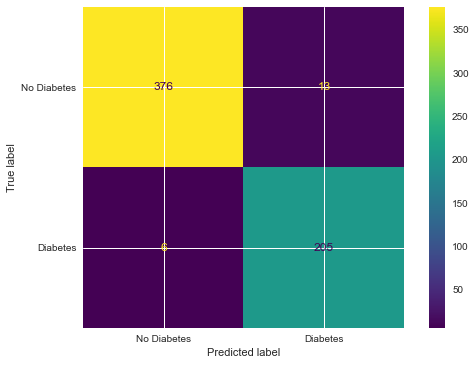

In [216]:
# predict the test set
test_predict = rf_gs.predict(test_X)
ConfusionMatrixDisplay.from_estimator(rf_gs, test_X, test_y, display_labels=["No Diabetes", "Diabetes"])
plt.show()

### The result of RF:

In [217]:
# other metrics
rf_accuracy = accuracy_score(test_y, test_predict)
rf_precision  = precision_score(test_y, test_predict)
rf_recall  = recall_score(test_y, test_predict)
print(f"Accuracy: {rf_accuracy}\nPrecision: {rf_precision}\nRecall: {rf_recall}")

Accuracy: 0.9683333333333334
Precision: 0.9403669724770642
Recall: 0.9715639810426541


In [218]:
# Adding model result
models_metrics["RF"] = [rf_accuracy, rf_precision, rf_recall]

## Voting Models
in this step we will compare the models that we have been used by compine them in one model.

In hard voting (also known as majority voting), every individual classifier votes for a class, and the majority wins.

In soft voting, every individual classifier provides a probability value that a specific data point belongs to a particular target class. The predictions are weighted by the classifier's importance and summed up. Then the target label with the greatest sum of weighted probabilities wins the vote.

In [219]:
# create the models for voting ensemble with the best parameter we found
estimators = [("knn", KNeighborsClassifier(n_neighbors=knn_param["n_neighbors"])), 
              ("nb", GaussianNB()),
              ("dt", DecisionTreeClassifier(random_state=random_state, ccp_alpha=best_alpha)), 
              ("rf", RandomForestClassifier(random_state=random_state,
                                            max_features=rf_param["max_features"], 
                                            criterion=rf_param["criterion"], 
                                            n_estimators=rf_param["n_estimators"]))]
weights = [models_metrics["KNN"][0], models_metrics["NB"][0], models_metrics["DT"][0], models_metrics["RF"][0] ]

In [220]:
param_dict = {
    "voting": ["hard", "soft"],
    "weights": [None, weights]
}
voting_gs = GridSearchCV(VotingClassifier(estimators=estimators), 
                         param_grid=param_dict,
                         cv=5)
voting_gs.fit(train_X, train_y)

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('knn',
                                                     KNeighborsClassifier(n_neighbors=100)),
                                                    ('nb', GaussianNB()),
                                                    ('dt',
                                                     DecisionTreeClassifier(random_state=42)),
                                                    ('rf',
                                                     RandomForestClassifier(criterion='entropy',
                                                                            max_features='sqrt',
                                                                            n_estimators=800,
                                                                            random_state=42))]),
             param_grid={'voting': ['hard', 'soft'],
                         'weights': [None,
                                     [0.9766666666666667, 0.

### the results of Voting Model:

In [221]:
test_prediction = voting_gs.predict(test_X)
voting_accuracy = accuracy_score(test_y, test_prediction)
voting_precision = precision_score(test_y, test_prediction)
voting_recall = recall_score(test_y, test_prediction)
print(f"Accuracy: {voting_accuracy}\nPrecision: {voting_precision}\nRecall: {voting_recall}")
models_metrics["VOTING"] = [voting_accuracy, voting_precision, voting_recall]

Accuracy: 0.9666666666666667
Precision: 0.95260663507109
Recall: 0.95260663507109


## Compare the models:
in this stage we will compare the results of the models we have been built and we will visualise the comparison process and display them in diagrams and tables

In [222]:
# create a dataframe from models results
metrics_df = pd.DataFrame(models_metrics.values(), 
                          columns=["Accuracy", "Percision", "Recall"], 
                          index=models_metrics.keys())
metrics_df

,Accuracy,Percision,Recall
KNN,0.976667,0.990050,0.943128
NB,0.790000,0.720207,0.658768
DT,0.960000,0.919283,0.971564
RF,0.968333,0.940367,0.971564
VOTING,0.966667,0.952607,0.952607


Text(0.5, 1.0, 'Recall')

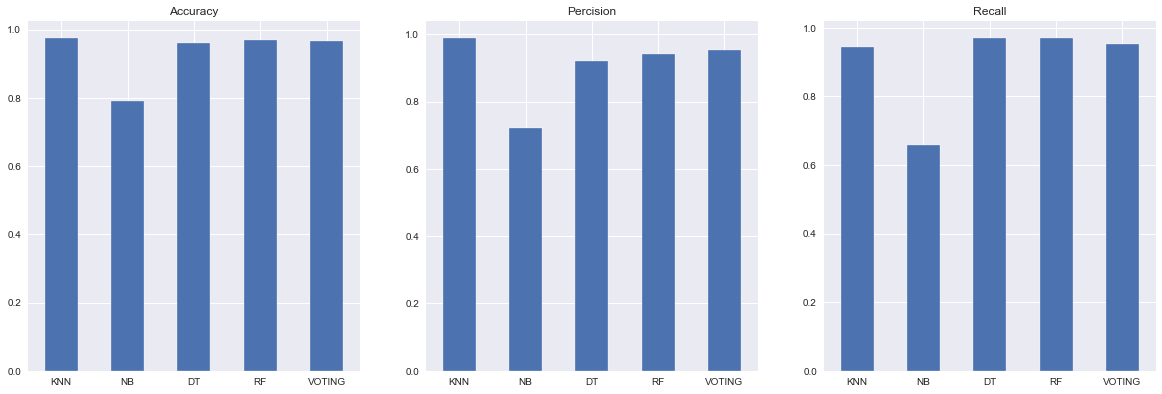

In [223]:
# create figure comparing result of different models
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
metrics_df["Accuracy"].plot(kind="bar", ax=axes[0], rot=0)
axes[0].set_title("Accuracy")
metrics_df["Percision"].plot(kind="bar", ax=axes[1], rot=0)
axes[1].set_title("Percision")
metrics_df["Recall"].plot(kind="bar", ax=axes[2], rot=0)
axes[2].set_title("Recall")

# Conclusion
In the end, we found that choosing the optimal model depends on previous experience and expertise. The accuracy of the models varies according to the type of data set, some of them depend on the number of data and some of them are sensitive to noise data. Diversity of models helps to avoid some errors that may lead to lower accuracy.

Faisal S. Aldarees  440012582<br>
Abdulaziz M. Alotaibi 440014077<br>
Ahmad O. Ahmad  440028238<br>